## Importing Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Creating path to main project 'InstacartBasket'

In [2]:
path = r"C:\Users\Leeza\Desktop\Data Analytics\Data Immersion\Python\Instacart Basket Analysis"

In [3]:
# Importing customer updated file
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods.pkl'))

In [5]:
df1=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_updated.pkl'))

In [8]:
df1.shape

(30964564, 36)

In [4]:
df.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_of_joining', 'dependents_counts', 'family_status', 'income',
       'order_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'Busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'avg_prices',
       'spending_flag', 'median_dspo', 'order_frequency'],
      dtype='object')

## Q2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### Answer: Please refer to the attached file "4.9 Data Visualization with python"

## Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

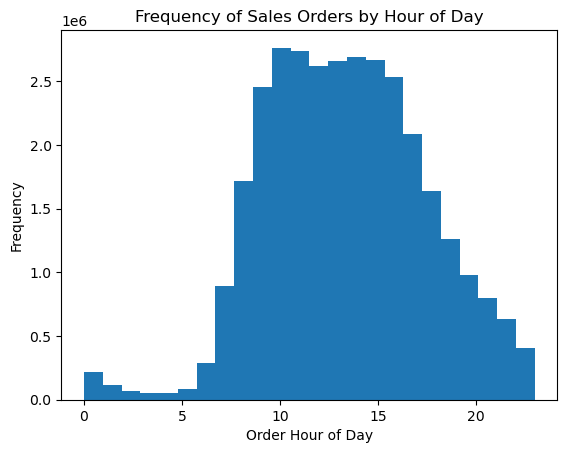

In [24]:
# creating histogram for 'order_hour_of_day'
hist=df['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Frequency of Sales Orders by Hour of Day')
plt.xlabel('Order Hour of Day')
plt.ylabel('Frequency')

### The histogram shows the frequency of sales orders by hour of day. The x-axis shows the hour of day, and the y-axis shows the frequency of sales orders. The histogram shows that the most sales orders occur between the hours of 10am and 2pm. There is a slight decrease in sales orders between 2pm and 5pm, and then a significant decrease in sales orders after 5pm.
### People are more likely to place sales orders during their lunch break, which is typically between the hours of 12pm and 1pm.
### People are also more likely to place sales orders after work, which is typically between the hours of 5pm and 7pm. However, the significant decrease in sales orders after 5pm suggests that people are less likely to place sales orders after they have had a chance to relax and unwind.
### Businesses can use the information from this histogram to develop strategies to increase sales during off-peak hours. For example, businesses could offer discounts or promotions during off-peak hours to encourage people to place sales orders. Businesses could also invest in marketing campaigns to increase awareness of their products and services during off-peak hours.

## Q4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

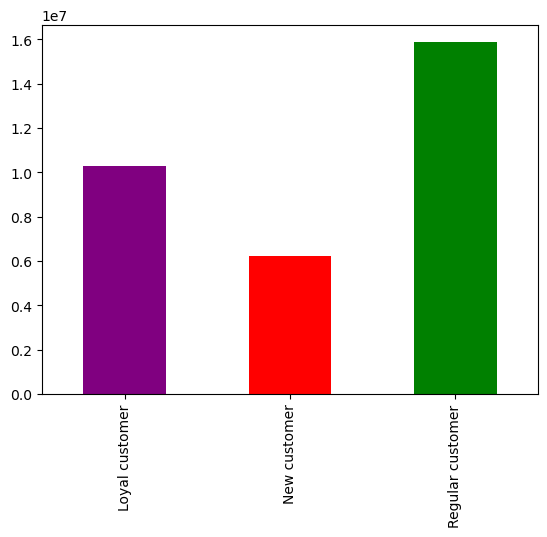

In [6]:
bar=df['loyalty_flag'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'green'])


## Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [7]:
#set the seed for reproducible code generation
np.random.seed(4)

In [8]:
#70 % sample testing
dev = np.random.rand(len(df)) <= 0.7

In [9]:
#70 % sample list created
big = df[dev]

In [10]:
#30 % sample list created
small = df[~dev]

In [11]:
# Verifying length of actual dataframe and samples
len(df)


32404859

In [12]:
len(big)+len(small)

32404859

In [13]:
df_1 = small[['order_hour_of_day','prices']]

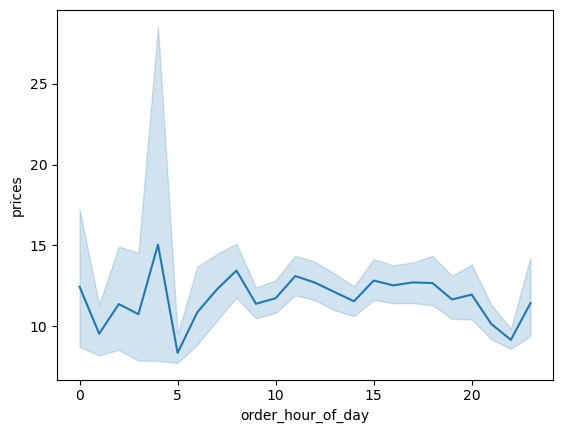

In [23]:
# Line chart for these two columns prices and order_hour_of_day
line_prices_hrs = sns.lineplot(data = df_1, x = 'order_hour_of_day',y = 'prices')

### There is no significant difference in expenditure (the "prices" column) depending on the hour of the day. The line graph shows that the prices are relatively constant throughout the day, with only minor fluctuations.
### It is possible that there is a difference in prices depending on the hour of the day on different days of the week, or during different times of the year.

## Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [15]:
df_2 = small[['dependents_counts','age']]

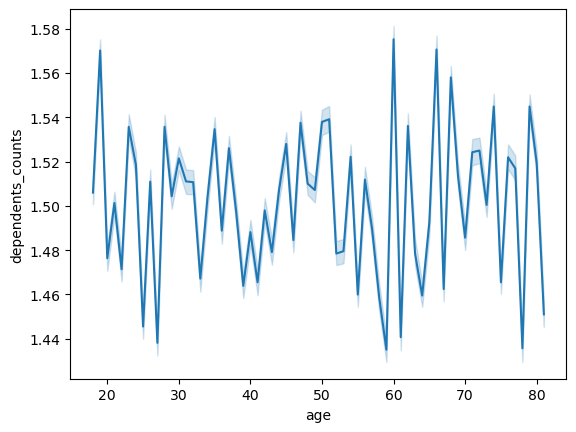

In [19]:
# Line chart for these two columns age and dependents_counts
line = sns.lineplot(data = df_2, x = 'age',y = 'dependents_counts')

### No, we cannot determine whether there’s a connection between age and family situation by seeing the line chart .The line chart only shows the average number of dependents by age group.
### To determine whether there’s a connection between age and family situation, we would need to see a more detailed breakdown of the data. For example, we could look at a bar chart that shows the number of people in each age group and their family situation(married,divorced,widowed).

## Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

In [20]:
df_3 = small[['age','income']]

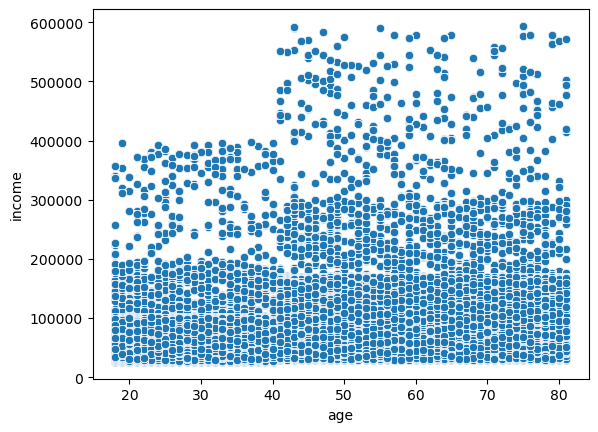

In [22]:
# scatterplot of age and income
scatter = sns.scatterplot(x = 'age', y = 'income',data = df_3)

### The scatter plot shows that there is a general trend of increasing income with age. The line chart shows that the average income increases with age up to the age group of 40-55.This is likely because people are more likely to have higher levels of education and work experience as they get older. These factors can lead to higher earnings.

## Q8. Export your visualizations as “.png” files in your relevant project folder.

In [25]:
# Export the figures using savefig function
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hourly_sales_frequency.png'))


In [26]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))
line_prices_hrs.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hrs.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_family.png'))
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))
